In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import sys
import json
import time
from datetime import datetime
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict
import system_comparison_plots
%matplotlib inline


# Load the results

In [57]:
df = system_comparison_plots.load_e2e_experiments()
summary_fname = "results_summary.pkl"
df.to_pickle(summary_fname)
df = pd.read_pickle(summary_fname)

# Plot the results

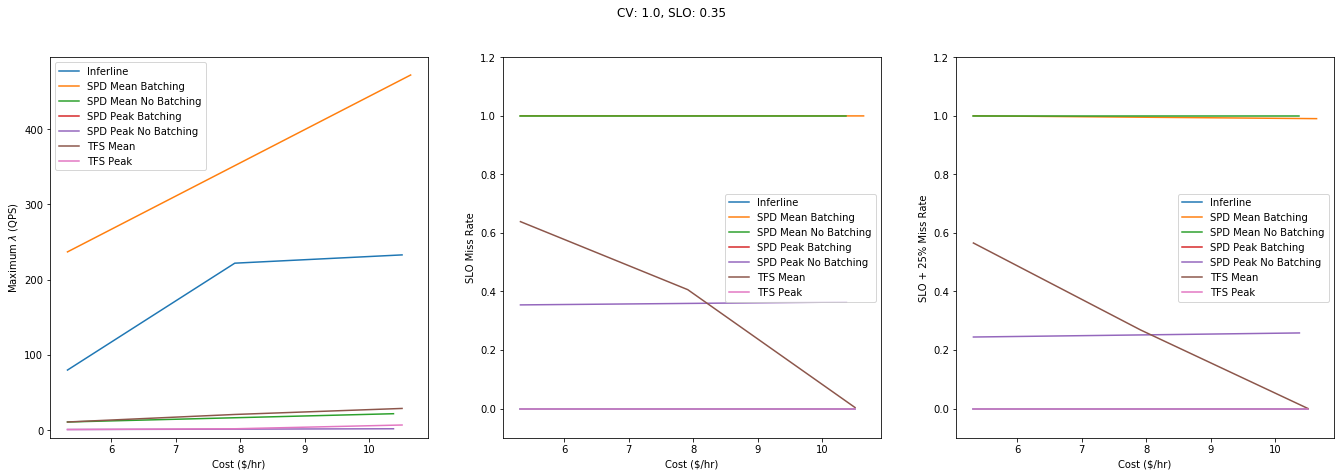

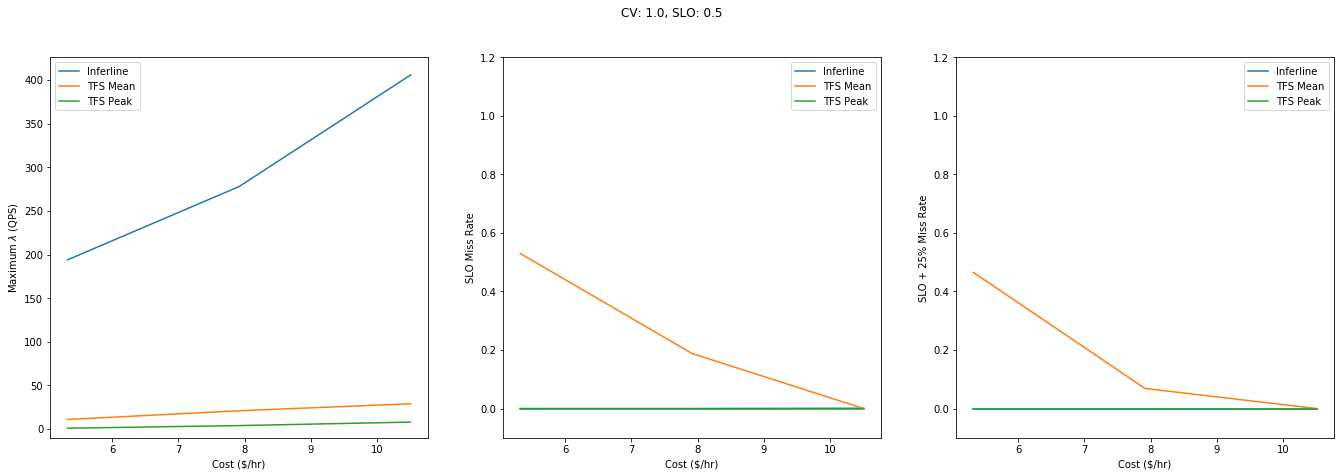

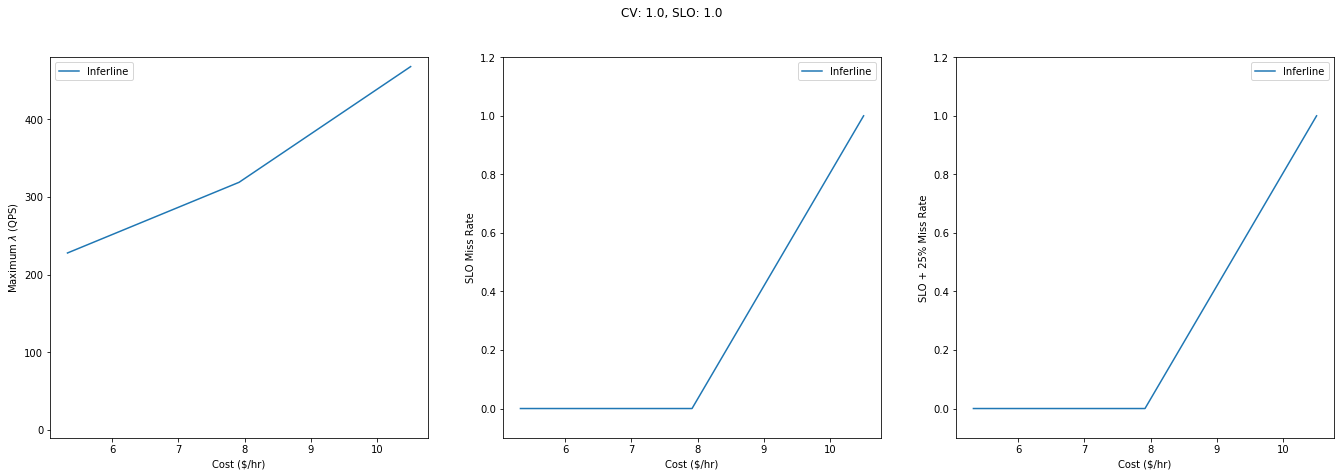

In [62]:
for cv, cv_group in df.groupby(df.CV):
    for slo, slo_group in cv_group.groupby(cv_group.slo):
        fig, (ax_lam, ax_slo, ax_slo_25) = plt.subplots(nrows=1, ncols=3, figsize=(23, 7))
        for name, name_group in slo_group.groupby(slo_group.name):
            name_group = name_group.sort_values("cost")
            ax_lam.plot(name_group.cost, name_group["lambda"], label=name)
            ax_slo.plot(name_group.cost, name_group.slo_miss_rate, label=name)
            ax_slo_25.plot(name_group.cost, name_group.slo_plus_25_per_miss_rate, label=name)
        ax_lam.set_ylabel("Maximum $\lambda$ (QPS)")
        ax_lam.set_xlabel("Cost ($/hr)")
        ax_lam.set_ylim(bottom=-10)
        ax_slo.set_xlabel("Cost ($/hr)")
        ax_slo.set_ylabel("SLO Miss Rate")
        ax_slo.set_ylim((-.1,1.2))
        ax_slo_25.set_xlabel("Cost ($/hr)")
        ax_slo_25.set_ylabel("SLO + 25% Miss Rate")
        ax_slo_25.set_ylim((-.1,1.2))

        ax_slo.legend(loc=0)
        ax_slo_25.legend(loc=0)

        ax_lam.legend(loc=0)
        fig.suptitle("CV: {cv}, SLO: {slo}".format(cv=cv, slo=slo))

            
    